In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('Bank.csv')
df['loan'] = df['loan'].replace(['no','yes'],[0,1])
df['y'] = df['y'].replace(['no','yes'],[0,1])
df.describe()

,age,balance,loan,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,0.160226,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,0.366820,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,0.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,0.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,0.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,1.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [3]:
from sklearn.preprocessing import StandardScaler
#取出age、balance、duration、campaign、previous
newdf = df[['age','balance','duration','campaign','previous']]
#標準化
scaler = StandardScaler().fit(newdf)
df_std = scaler.transform(newdf)
#建立新的tab
df2 = pd.DataFrame(df_std, columns = ['age','balance','duration','campaign','previous'])
df2.describe()

#觀察age、balance
df3 = df2[["age","balance"]]

In [4]:
df3.describe()

,age,balance
count,4.521100e+04,4.521100e+04
mean,5.222844e-16,3.070663e-15
std,1.000011e+00,1.000011e+00
min,-2.159994e+00,-3.081149e+00
25%,-7.473845e-01,-4.237719e-01
50%,-1.823406e-01,-3.002800e-01
75%,6.652252e-01,2.158743e-02
max,5.091402e+00,3.309478e+01


# kmeans

km_test = KMeans(n_clusters=3, init='random')
km_pred_test = km.fit_predict(df3)

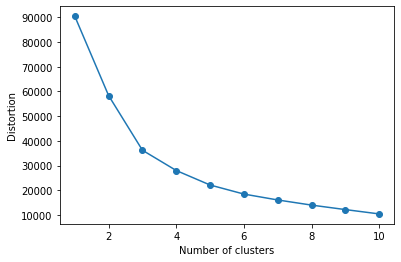

In [4]:
lst_dst = []

#轉折圖
for i in range(1, 11):
    km_test = KMeans(n_clusters=i,random_state=777)
    km_test.fit(df3)
    lst_dst.append(km_test.inertia_)

plt.plot(range(1, 11), lst_dst, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion');

In [ ]:
plt.title('KMeans=3 groups')
plt.scatter(df3["age"], df3["balance"], c=km_pred, cmap=plt.cm.Set1)
plt.tight_layout()
plt.show()

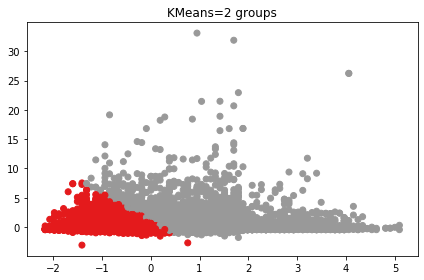

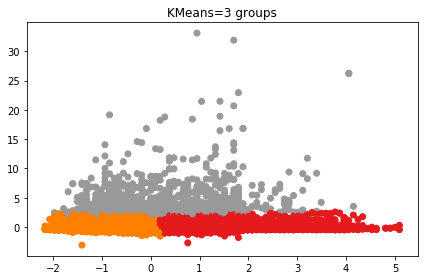

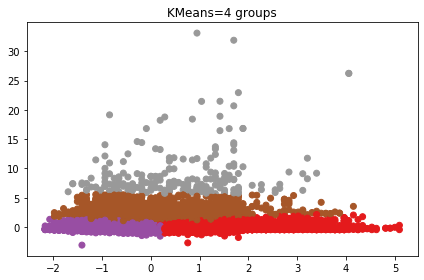

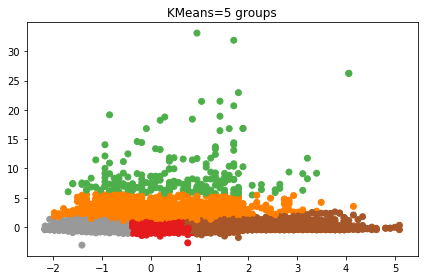

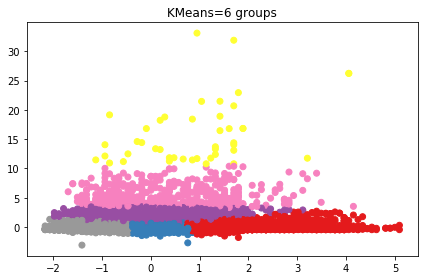

In [5]:
#散佈圖
for i in range(2,7):
    km_test = KMeans(n_clusters=i, random_state=777)
    km_pred_test = km_test.fit_predict(df3)
    plt.title('KMeans=%s groups'%(i))
    plt.scatter(df3["age"], df3["balance"], c=km_pred_test, cmap=plt.cm.Set1)
    plt.xlabel("age")
    plt.ylabel("balance")
    plt.tight_layout()
    plt.show()

In [ ]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples, silhouette_score

for n_clusters in range(2,7):
    fig, ax = plt.subplots(1, 1, dpi=100)
    # 雖然輪廓係數範圍是[-1, 1]，但這裡只顯示[-0.2, 0.8]之間
    ax.set_xlim([-.2, .8])
    ax.set_ylim([0, len(df3)+(n_clusters+1)*10])
    # 建立 k-means 模型並擬合數據
    km_test = KMeans(n_clusters=n_clusters, random_state=0)
    km_pred_test = km.fit_predict(df3)
    # 取出分群結果的標籤
    labels = np.unique(km_pred_test)
    # 計算所有樣本的輪廓係數平均值
    silhouette_avg = silhouette_score(df3, km_pred_test)
    print("n_clusters =", n_clusters,
          "，所有樣本的輪廓係數平均 =", silhouette_avg)
    # 計算每個樣本的輪廓係數
    silhouette = silhouette_samples(df3, km_pred_test, 
                                    metric='euclidean')
    y_lower = 10
    for i, c in enumerate(labels):
        c_silhouette = silhouette[km_pred_test == c]
        c_silhouette.sort()
        size_cluster_i = c_silhouette.shape[0]
        y_upper = y_lower + size_cluster_i
        # 產生顏色編號，並填入區間內
        color = cm.nipy_spectral(float(i)/n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, 
                         c_silhouette, facecolor=color, 
                         edgecolor=color, alpha=0.7)
        # 標示集群標籤
        ax.text(-0.05, y_lower+0.5*size_cluster_i, str(i))
        y_lower = y_upper + 10
        
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")
    
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_yticks([])
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8])

In [7]:
from sklearn.metrics import silhouette_score

#輪廓係數
for n_clusters in range(2,7):
    # 建立 k-means 模型並擬合數據
    km_test = KMeans(n_clusters=n_clusters, random_state=777)
    km_pred_test = km_test.fit_predict(df3)
    # 計算所有樣本的輪廓係數平均值
    silhouette_avg = silhouette_score(df3, km_pred_test)
    print("n_clusters =", n_clusters,
          "，所有樣本的輪廓係數平均 =", silhouette_avg)

n_clusters = 2 ，所有樣本的輪廓係數平均 = 0.4798689630839253
n_clusters = 3 ，所有樣本的輪廓係數平均 = 0.5095997936303313
n_clusters = 4 ，所有樣本的輪廓係數平均 = 0.5224082123594794
n_clusters = 5 ，所有樣本的輪廓係數平均 = 0.422997871693572
n_clusters = 6 ，所有樣本的輪廓係數平均 = 0.43030413724114347


In [4]:
from sklearn.metrics.cluster import adjusted_rand_score

#調整蘭德指數
for n_clusters in range(2,7):
    # 建立 k-means 模型並擬合數據
    km_test = KMeans(n_clusters=n_clusters, random_state=777)
    km_pred_test = km_test.fit_predict(df3)
    # 計算所有樣本的輪廓係數平均值
    ARI = adjusted_rand_score(df["y"], km_pred_test)
    print("n_clusters =", n_clusters,
          "，調整蘭德指數 =", ARI)

n_clusters = 2 ，調整蘭德指數 = 0.002985404720625628
n_clusters = 3 ，調整蘭德指數 = 0.004135744546747769
n_clusters = 4 ，調整蘭德指數 = 0.006669566997185815
n_clusters = 5 ，調整蘭德指數 = 0.004207323153902637
n_clusters = 6 ，調整蘭德指數 = 0.004460413890941474


In [20]:
#取n=4
km = KMeans(n_clusters=4, random_state=777)
km_pred = km.fit_predict(df3)

In [45]:
import copy

#統計每個集群的大小
count = copy.deepcopy(df3)
count['cluster'] = km_pred
km_c = count['cluster'].value_counts(sort=False)
print(km_c)

0    15593
1    26527
2     2869
3      222
Name: cluster, dtype: int64


In [ ]:
# 取出分群結果的標籤
labels = np.unique(km_pred)
# 計算所有樣本的輪廓係數平均值
silhouette_avg = silhouette_score(df3, km_pred)
print("n_clusters =", 4,
          "，所有樣本的輪廓係數平均 =", silhouette_avg)

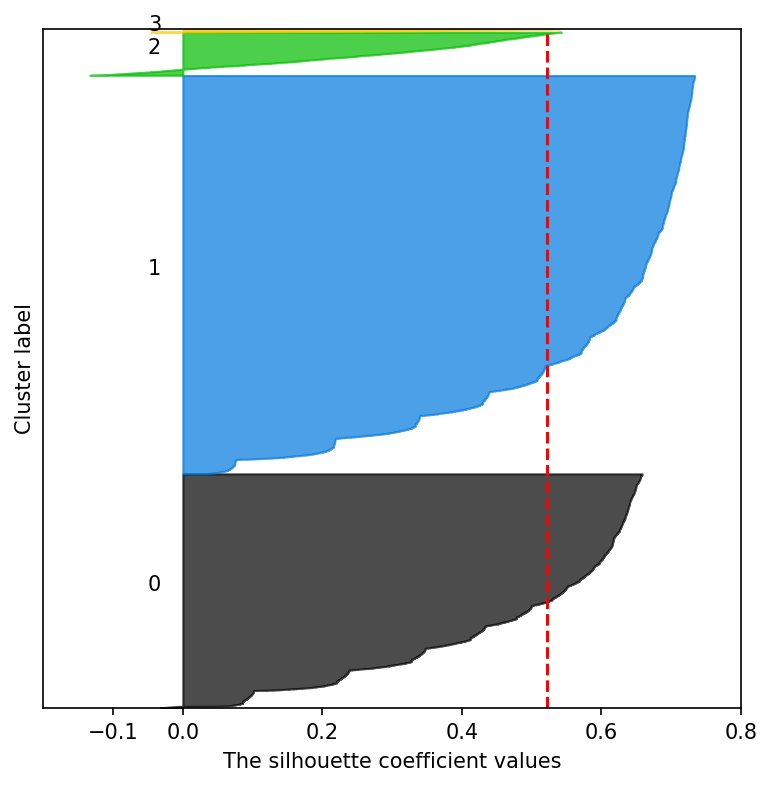

In [22]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples, silhouette_score

fig, ax = plt.subplots(figsize=(6,6), dpi=150)

ax.set_xlim([-.2, .8])
ax.set_ylim([0, len(df3)+(4+1)*10])
    
# 計算每個樣本的輪廓係數
silhouette = silhouette_samples(df3, km_pred, 
                                    metric='euclidean')
y_lower = 10
for i, c in enumerate(labels):
    c_silhouette = silhouette[km_pred == c]
    c_silhouette.sort()
    size_cluster_i = c_silhouette.shape[0]
    y_upper = y_lower + size_cluster_i
    # 產生顏色編號，並填入區間內
    color = cm.nipy_spectral(float(i)/4)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, 
                        c_silhouette, facecolor=color, 
                        edgecolor=color, alpha=0.7)
    # 標示集群標籤
    ax.text(-0.05, y_lower+0.5*size_cluster_i, str(i))
    y_lower = y_upper + 10
        
ax.set_xlabel("The silhouette coefficient values")
ax.set_ylabel("Cluster label")
    
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks([])
ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8])

plt.show()

In [12]:
km = KMeans(n_clusters=4, random_state=777)
km_pred = km.fit_predict(df3)
# 計算所有樣本的輪廓係數平均值
silhouette_avg = silhouette_score(df3, km_pred)
print("n_clusters =", 4,
          "，所有樣本的輪廓係數平均 =", silhouette_avg)

n_clusters = 4 ，所有樣本的輪廓係數平均 = 0.6069220383221168


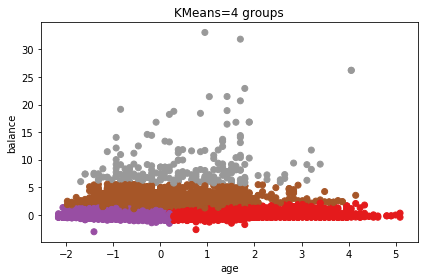

In [14]:
plt.title('KMeans=4 groups')
plt.scatter(df3["age"], df3["balance"], c=km_pred, cmap=plt.cm.Set1)
plt.xlabel("age")
plt.ylabel("balance")
plt.tight_layout()
plt.show()

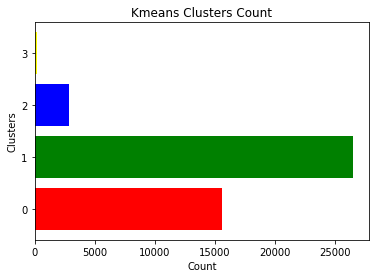

In [47]:
#長條圖
plt.barh(["0","1","2","3"], [km_c[0],km_c[1],km_c[2],km_c[3]], color=['red', 'green', 'blue', 'yellow'])
plt.yticks(["0","1","2","3"])
plt.ylabel('Clusters')
plt.xlabel('Count')
plt.title('Kmeans Clusters Count')
plt.show()